In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
# Load in the data
weather_train = pd.read_csv('weather_train.csv', parse_dates=True)

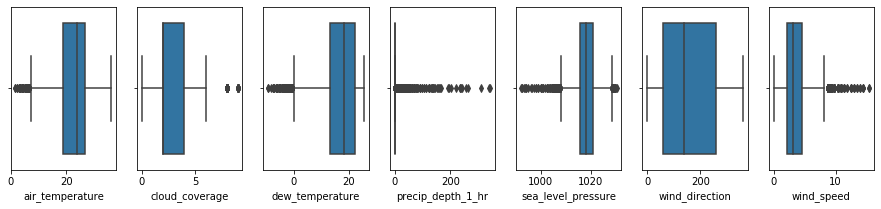

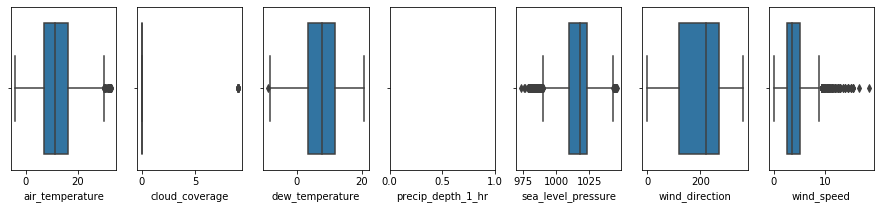

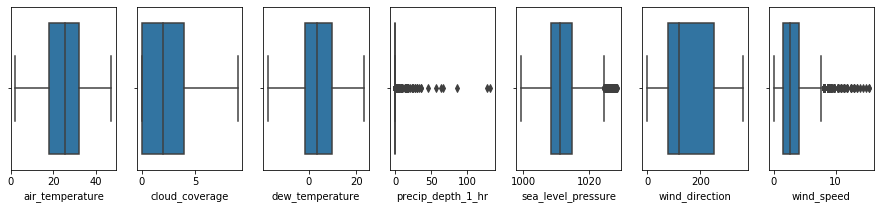

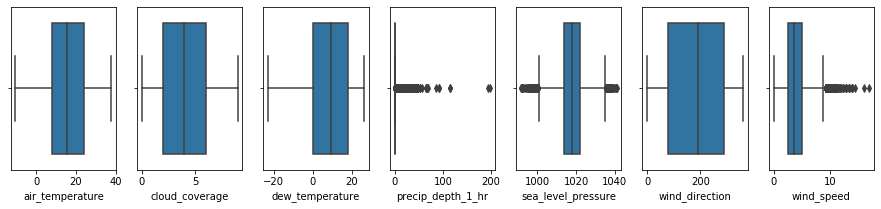

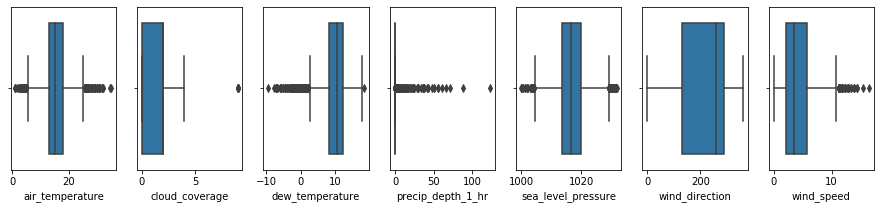

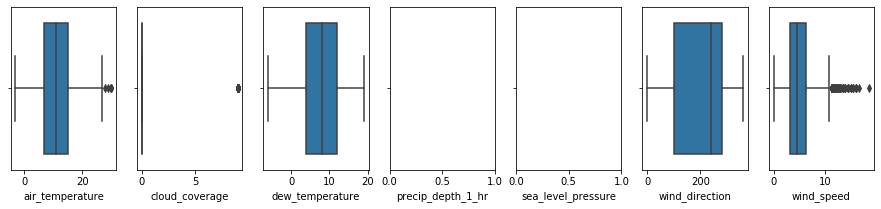

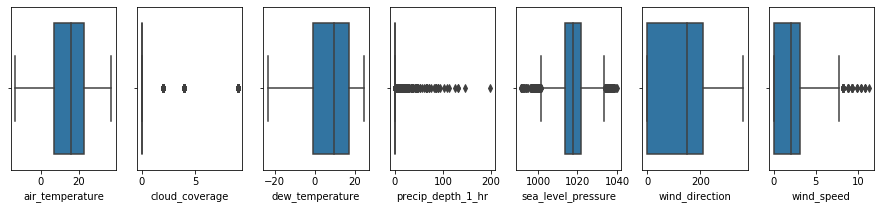

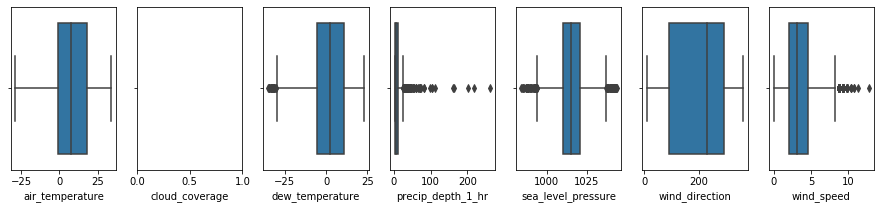

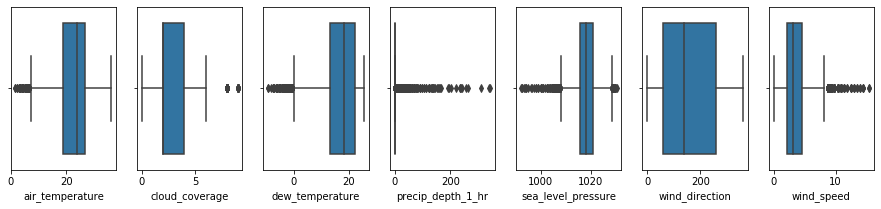

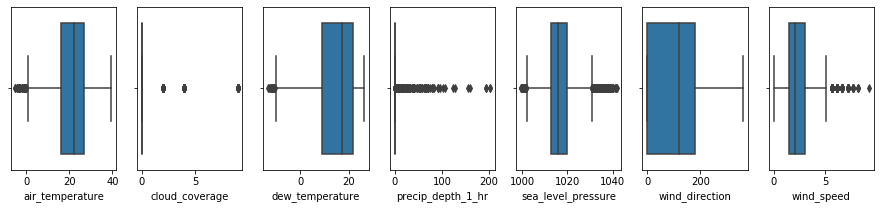

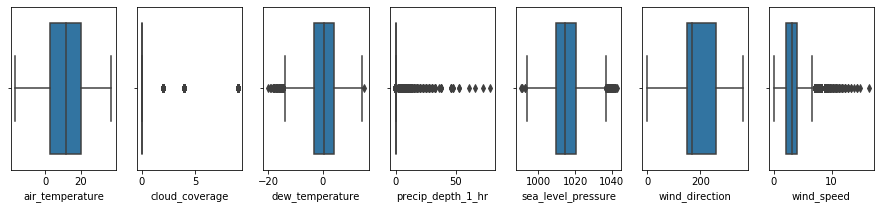

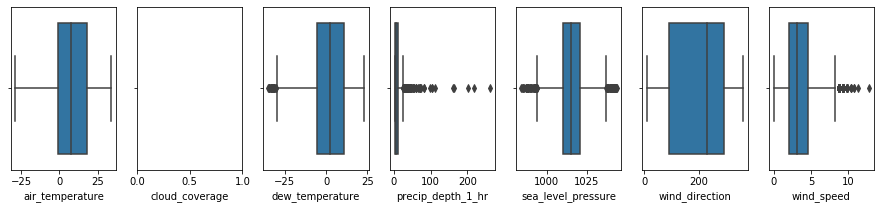

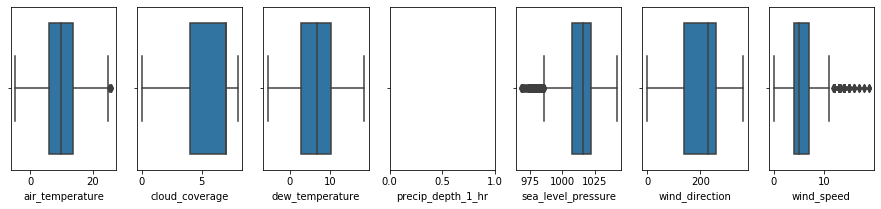

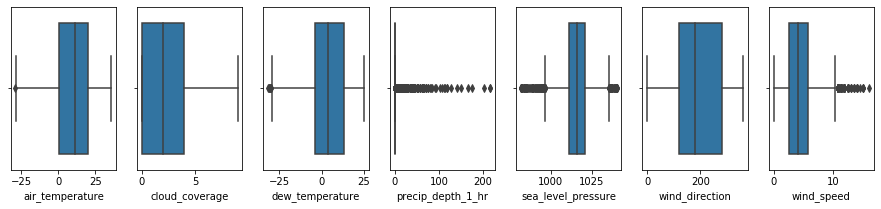

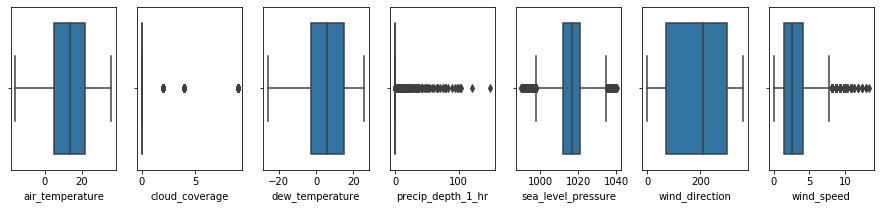

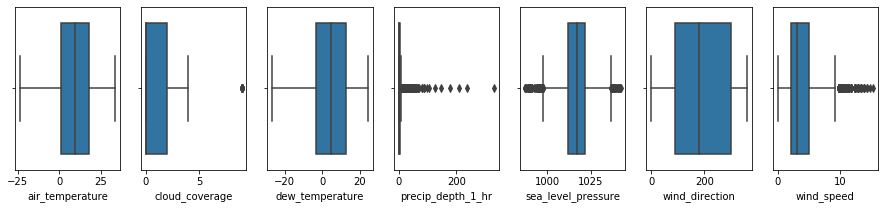

In [3]:
# Box plot for each feature based on different site id.
site_id = weather_train.site_id.unique()
for siid in site_id:
    plt.figure(figsize=(20, 3))
    # i: index
    for i, col in enumerate(weather_train.columns):
        if col == 'site_id':
            continue
        if col == 'timestamp':
            continue
        plt.subplot(1, 9, i+1)
        data = weather_train.loc[weather_train.site_id == siid][col]
        sns.boxplot(data)

In [4]:
# Missing data inspect function
# inspect a specific feature based on site_id


def missing_value_inspect_single(df, col_name):
    site_id = df.site_id.unique()
    for siid in site_id:
        inpect_data = df.loc[df.site_id == siid][col_name]
        print(round((inpect_data.isna().sum()/len(inpect_data)), 4))

# Missing data inspect function for each feature based on different site id


def missing_value_inspect(df):
    missing_value_report = pd.DataFrame(
        columns=['col_site', 'num_of_missing', 'total_data', 'missing_rate'])
    site_id = df.site_id.unique()
    for i, col in enumerate(df.columns):
        if col == 'site_id':
            continue
        if col == 'timestamp':
            continue
        for siid in site_id:
            inpect_data = df.loc[df.site_id == siid][col]
            missing_value_num = inpect_data.isna().sum()
            inspect_data_len = len(inpect_data)
            missing_rate = round(
                round((missing_value_num/inspect_data_len), 4)*100, 2)
            missing_value_report = missing_value_report.append({'col_site': str(
                col)+'_'+str(siid), 'num_of_missing': missing_value_num, 'total_data': inspect_data_len, 'missing_rate': str(missing_rate)+'%'}, ignore_index=True)
    return missing_value_report


missing_report = missing_value_inspect(weather_train)
missing_report

,col_site,num_of_missing,total_data,missing_rate
0,air_temperature_0,3,8784,0.03%
1,air_temperature_1,1,8763,0.01%
2,air_temperature_2,1,8783,0.01%
3,air_temperature_3,4,8780,0.05%
4,air_temperature_4,0,8783,0.0%
...,...,...,...,...
107,wind_speed_11,0,8614,0.0%
108,wind_speed_12,0,8755,0.0%
109,wind_speed_13,1,8783,0.01%
110,wind_speed_14,23,8777,0.26%


In [5]:
weather_train.isna().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

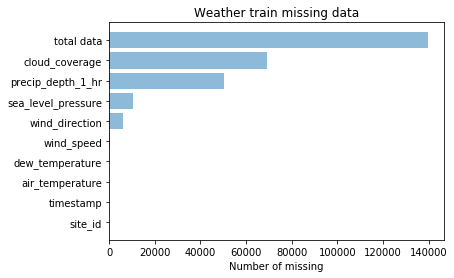

In [6]:
# Missing data bar plot before data preprocessing
objects = ('site_id', 'timestamp', 'air_temperature', 'dew_temperature', 'wind_speed',
           'wind_direction', 'sea_level_pressure', 'precip_depth_1_hr', 'cloud_coverage', 'total data')
y_pos = np.arange(len(objects))
performance = [0, 0, 55, 113, 304, 6268, 10618, 50289, 69173, 139773]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.xlabel('Number of missing')
plt.yticks(y_pos, objects)
plt.title('Weather train missing data')

plt.show()

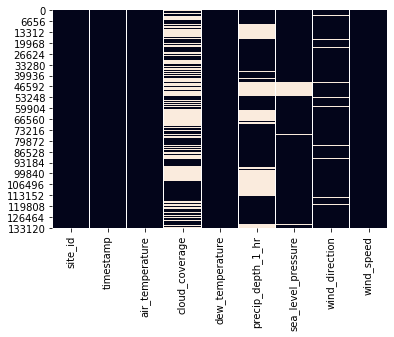

In [7]:
# Missing data plot before data preprocessing
sns.heatmap(weather_train.isnull(), cbar=False)

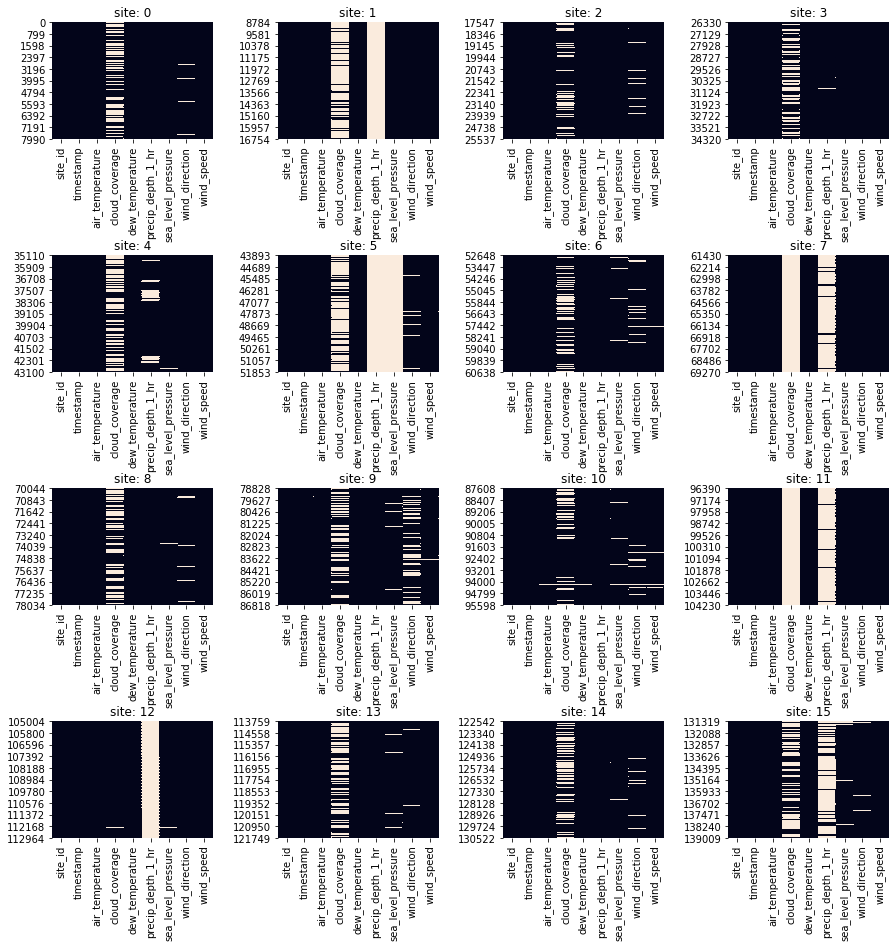

In [8]:
# Missing data plot for each feature based on different site_id
site_id = weather_train.site_id.unique()
# missing plot in general
plt.figure(figsize=(15, 15))
for i, siid in enumerate(site_id):
    plt.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=0.4, hspace=1)
    ax = plt.subplot(4, 4, i+1)
    # i: index
    data = weather_train.loc[weather_train.site_id == siid]
    sns.heatmap(data.isnull(), cbar=False)
    ax.set_title('site: '+str(siid))

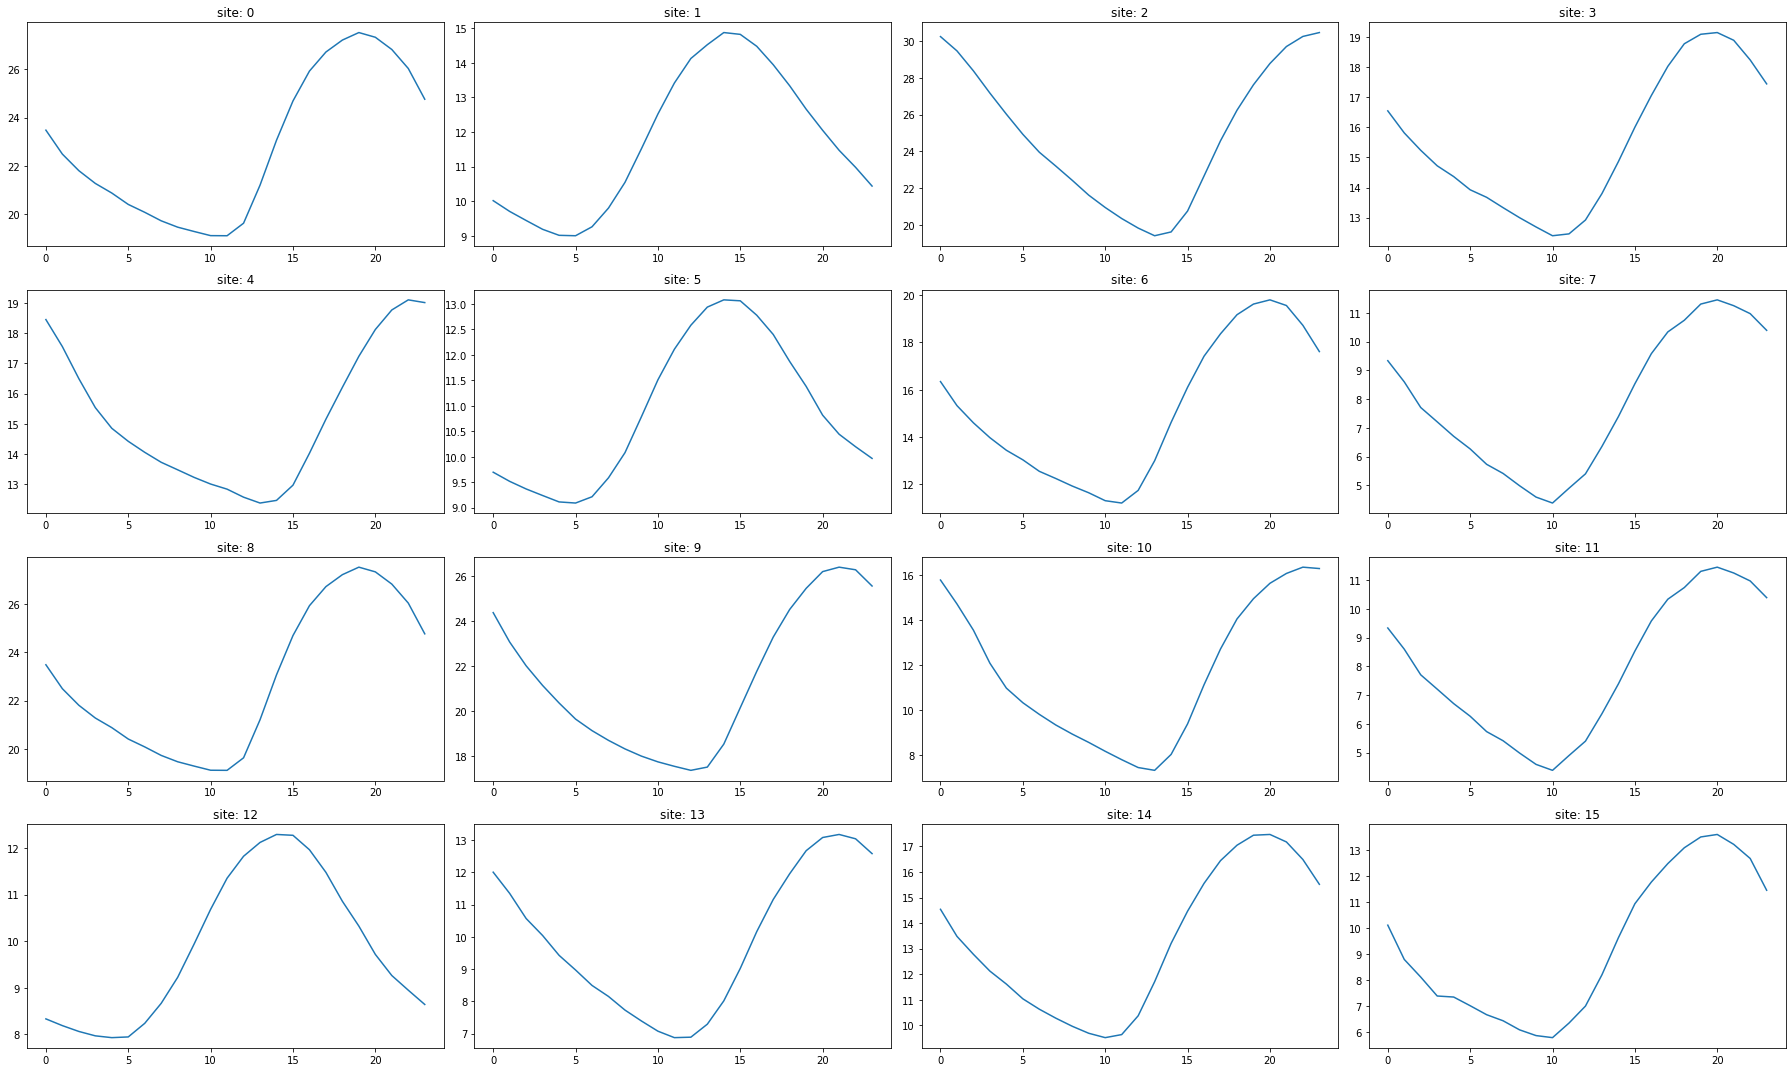

In [9]:
# Line plot for the temperature for each site
data_time = weather_train.copy()
data_time['timestamp'] = pd.to_datetime(data_time['timestamp'])
data_time['hour'] = data_time['timestamp'].dt.hour
air_temp_site_hour = data_time.groupby(['site_id', 'hour']).mean().reset_index()[
    ['site_id', 'hour', 'air_temperature']]
site_id = air_temp_site_hour.site_id.unique()
plt.figure(figsize=(25, 15))
for i, siid in enumerate(site_id):
    ax = plt.subplot(4, 4, i+1)
    data = air_temp_site_hour.loc[air_temp_site_hour.site_id == siid]
    plt.plot(data.hour, data.air_temperature)
    ax.set_title('site: '+str(siid))
plt.tight_layout()
plt.show()

In [12]:
# Load in the weather data after preprocessing
weather_final = pd.read_csv('weather_final1.csv', parse_dates=True)

In [13]:
# Extract the data only for weather train
miss_data_re = weather_final[['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
                              'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed']]

In [14]:
miss_data_re.isna().sum()

site_id                   0
timestamp                 0
air_temperature           0
cloud_coverage        17228
dew_temperature           0
precip_depth_1_hr     26273
sea_level_pressure     8755
wind_direction            0
wind_speed                0
dtype: int64

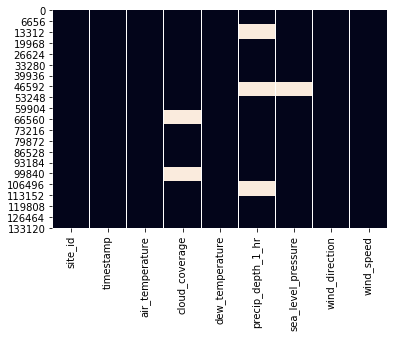

In [15]:
# Missing data plot after data preprocessing
sns.heatmap(miss_data_re.isnull(), cbar=False)

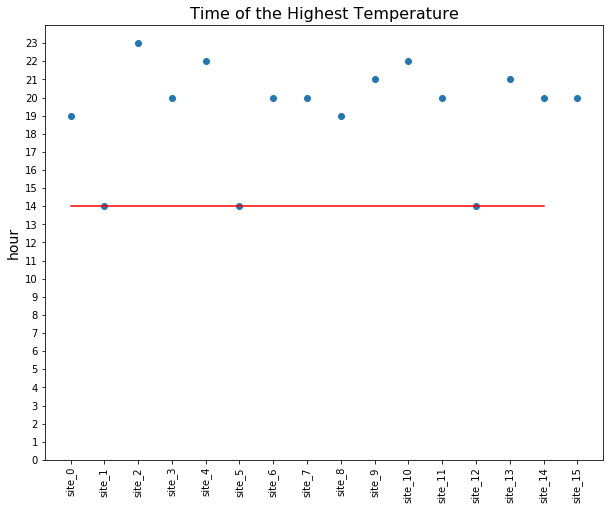

In [18]:
# Highest Temperature hour plot for each site
plt.figure(figsize=(10, 8))

axes = plt.gca()
names = ['site_0', 'site_1', 'site_2', 'site_3', 'site_4', 'site_5', 'site_6', 'site_7',
         'site_8', 'site_9', 'site_10', 'site_11', 'site_12', 'site_13', 'site_14', 'site_15']
values = [19, 14, 23, 20, 22, 14, 20, 20, 19, 21, 22, 20, 14, 21, 20, 20]

axes.set_ylim([0, 24])
plt.yticks(np.arange(0, 24, 1.0))
plt.scatter(names, values)
plt.xticks(rotation=90)
plt.title('Time of the Highest Temperature', fontsize=16)
plt.ylabel('hour', fontsize=14)
plt.plot([0, 14], [14, 14], 'k-', color='r')
plt.show()